## Task 1.1

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
ca = fetch_california_housing()
sns.set(color_codes=True)

In [3]:
print(ca.keys(),
      '\n\n',"Feature names:",ca.feature_names,
     '\n\n',ca.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR']) 

 Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 

 California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




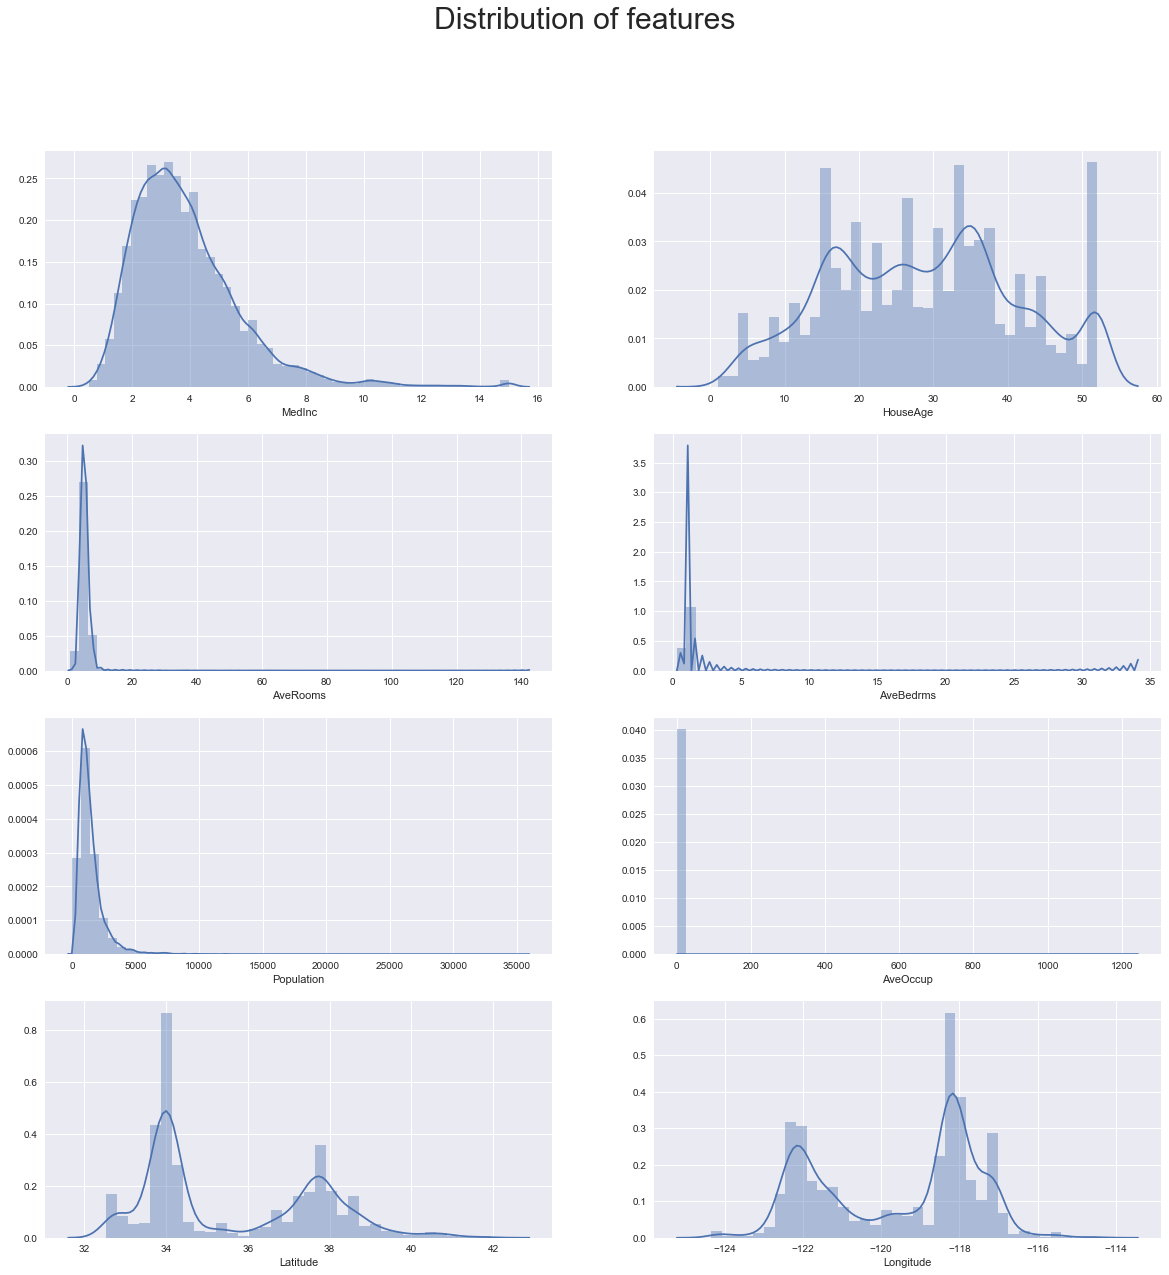

In [4]:
fig, axes = plt.subplots(4,2,figsize=(20,20))
k=0
for i in range(4):
    for j in range(2):
        sns.distplot(ca.data[:,k],axlabel=ca.feature_names[k], ax = axes[i,j])
        k+=1
plt.suptitle("Distribution of features", fontsize=30)

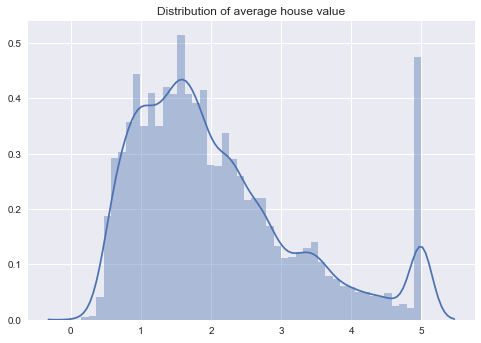

In [5]:
sns.distplot(ca.target)
plt.title("Distribution of average house value")

### Answer 1.1:

We can see that some features have very different magnitudes. Many distribution is far from normal, some data concentrate at the left side, so there exists some high outlier for those. For example AveRooms, AveBedrms, Population and AveOccup. We may have two treatment methods. We can remove the outliers for some features, and we can take log scale to decrease the magnitudes.

Also, we notice ltitude and longtitude are both bimodal distribution with two modes. And it seems AveRooms and AveBedrooms have similar distribution.

## Task 1.2

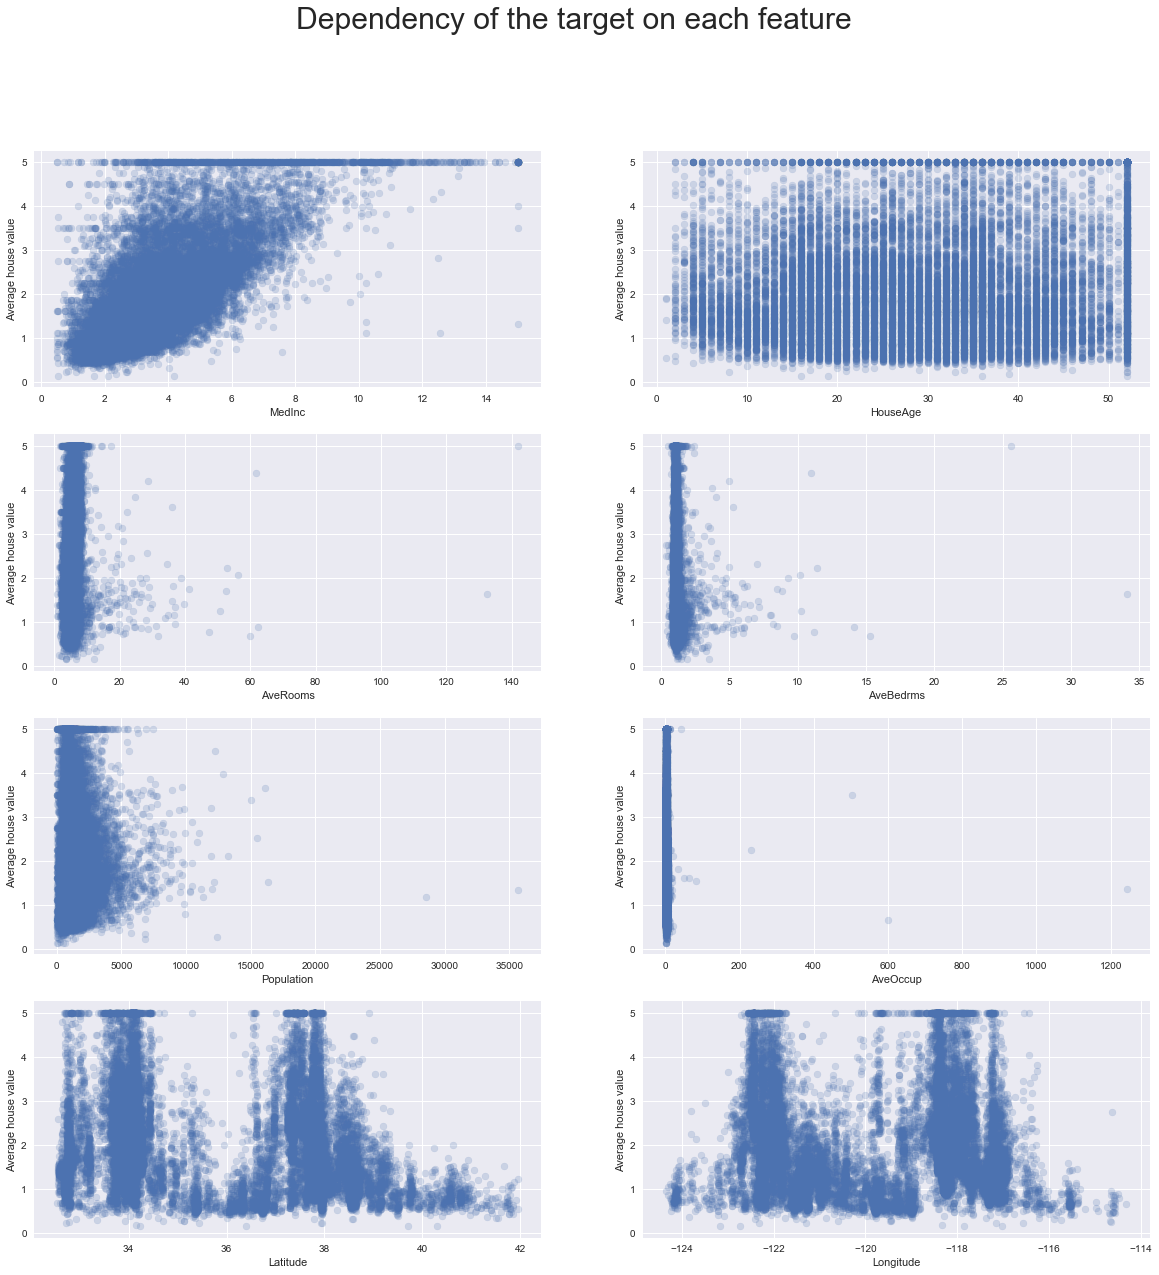

In [6]:
fig, axes = plt.subplots(4,2,figsize=(20,20))
k=0
for i in range(4):
    for j in range(2):
        axes[i,j].scatter(ca.data[:,k], ca.target, alpha=0.2)
        axes[i,j].set_xlabel(ca.feature_names[k])
        axes[i,j].set_ylabel('Average house value')   
        k+=1
plt.suptitle("Dependency of the target on each feature", fontsize=30)

## Task 1.3

In [7]:
X_train, X_test, y_train, y_test = train_test_split(ca.data, ca.target)
LR = LinearRegression()
RD = Ridge()
LS = Lasso()
EN = ElasticNet()

score_LR = np.mean(cross_val_score(LR, X_train, y_train))
score_RD = np.mean(cross_val_score(RD, X_train, y_train))
score_LS = np.mean(cross_val_score(LS, X_train, y_train))
score_EN = np.mean(cross_val_score(EN, X_train, y_train))

print("Mean cross-validation score for linear:{:.5f}".format(np.mean(score_LR)))
print("Mean cross-validation score for ridge:{:.5f}".format(np.mean(score_RD)))
print("Mean cross-validation score for lasso:{:.5f}".format(np.mean(score_LS)))
print("Mean cross-validation score for elasticnet:{:.5f}".format(np.mean(score_EN)))

Mean cross-validation score for linear:0.59696
Mean cross-validation score for ridge:0.59700
Mean cross-validation score for lasso:0.27405
Mean cross-validation score for elasticnet:0.41469


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

score_scaled_LR = np.mean(cross_val_score(LR, X_train_scaled, y_train))
score_scaled_RD = np.mean(cross_val_score(RD, X_train_scaled, y_train))
score_scaled_LS = np.mean(cross_val_score(LS, X_train_scaled, y_train))
score_scaled_EN = np.mean(cross_val_score(EN, X_train_scaled, y_train))

print("Mean scaled cross-validation score for linear:{:.5f}".format(np.mean(score_scaled_LR)))
print("Mean scaled cross-validation score for ridge:{:.5f}".format(np.mean(score_scaled_RD)))
print("Mean scaled cross-validation score for lasso:{:.5f}".format(np.mean(score_scaled_LS)))
print("Mean scaled cross-validation score for elasticnet:{:.5f}".format(np.mean(score_scaled_EN)))

Mean scaled cross-validation score for linear:0.59696
Mean scaled cross-validation score for ridge:0.59698
Mean scaled cross-validation score for lasso:-0.00016
Mean scaled cross-validation score for elasticnet:0.19796



## Answer 1.3:

No, the standard sclaer doesn't improve the result score. It has almost none effect on linear and linear and ridge, but make lasso and elasticnet worse.

## Task 1.4

In [24]:
param_grid = {'alpha': np.logspace(-1,3,30)}
grid_RD = GridSearchCV(RD, param_grid)
grid_RD.fit(X_train, y_train)
print("best mean cross-validation score:for ridge {:.5f}".format(grid_RD.best_score_))
print("best parameters: {}".format(grid_RD.best_params_))

best mean cross-validation score:for ridge 0.59894
best parameters: {'alpha': 108.2636733874054}


The result for Ridge doesn't change much.

In [15]:
param_grid = {'alpha': np.logspace(-4,-1,30)}
grid_LS = GridSearchCV(LS, param_grid)
grid_LS.fit(X_train, y_train)
print("best mean cross-validation score:for lasso {:.5f}".format(grid_LS.best_score_))
print("best parameters: {}".format(grid_LS.best_params_))

best mean cross-validation score:for lasso 0.59824
best parameters: {'alpha': 0.004520353656360241}


The result for lasso improved a lot, by 0.31

In [11]:
param_grid = {'alpha': np.logspace(-4,-1,30),
              'l1_ratio': [0.01, .1,.2,.3,.4, .5,.6,.7,.8, .9, .98, 1]}
grid_EN = GridSearchCV(EN, param_grid)
grid_EN.fit(X_train, y_train)
print("best mean cross-validation score:for elasticnet {:.5f}".format(grid_EN.best_score_))
print("best parameters: {}".format(grid_EN.best_params_))

best mean cross-validation score:for elasticnet 0.59894
best parameters: {'alpha': 0.011721022975334805, 'l1_ratio': 0.01}


The result for elasticnet improved a lot, by 0.18

## Ridge GridSearchCV Plot

In [40]:
grid_RD.cv_results_.keys()

dict_keys(['split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params'])

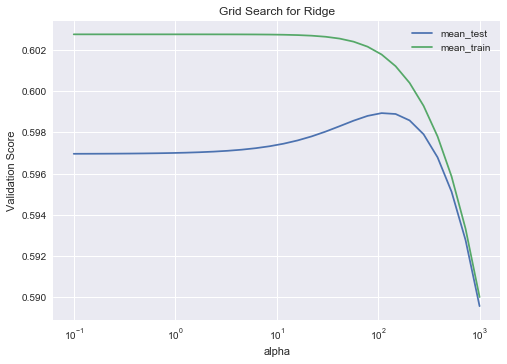

In [47]:
plt.plot(np.logspace(-1,3,30),grid_RD.cv_results_['mean_test_score'],label="mean_test")
plt.plot(np.logspace(-1,3,30),grid_RD.cv_results_['mean_train_score'],label="mean_train")
plt.xlabel("alpha")
plt.xscale("log")
plt.ylabel("Validation Score")
plt.title("Grid Search for Ridge")
plt.legend()

## Lasso GridSearchCV Plot

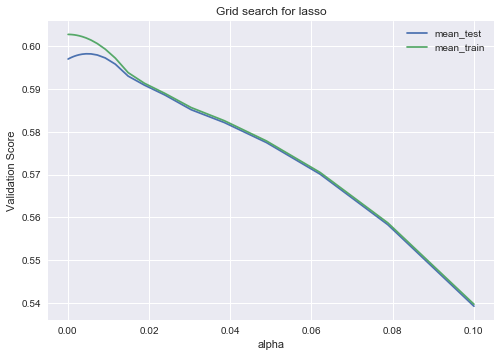

In [36]:
plt.plot(np.logspace(-4, -1, 30),grid_LS.cv_results_['mean_test_score'], label="mean_test")
plt.plot(np.logspace(-4, -1, 30),grid_LS.cv_results_['mean_train_score'], label="mean_train")
plt.xlabel("alpha")
plt.ylabel("Validation Score")
plt.title("Grid search for lasso")
plt.legend()

## ElasticNet GridSearchCV Plot 

In [28]:
xs = []
ys = []
for i in grid_EN.cv_results_['params']:
    xs.append(i['alpha'])
    ys.append(i['l1_ratio'])
zs = grid_EN.cv_results_['mean_test_score']

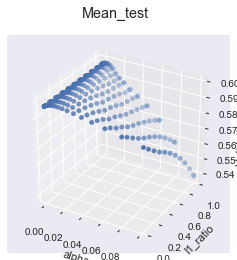

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('alpha')
ax.set_ylabel('l1_ratio')
ax.set_zlabel('Validation Score')
fig.suptitle("Mean_test")

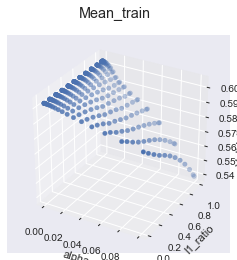

In [33]:
zs2 = grid_EN.cv_results_['mean_train_score']
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs2)
ax.set_xlabel('alpha')
ax.set_ylabel('l1_ratio')
ax.set_zlabel('Validation Score')
fig.suptitle("Mean_train")

## Task 1.5 

In [37]:
y_pos = np.arange(len(ca.feature_names))
LR.fit(X_train, y_train)
RD_best = Ridge(alpha=108.26)
RD_best.fit(X_train, y_train)
LS_best = Ridge(alpha= 0.00452)
LS_best.fit(X_train, y_train)
EN_best = ElasticNet(alpha=0.01172,l1_ratio=0.01)
EN_best.fit(X_train, y_train)

ElasticNet(alpha=0.01172, copy_X=True, fit_intercept=True, l1_ratio=0.01,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

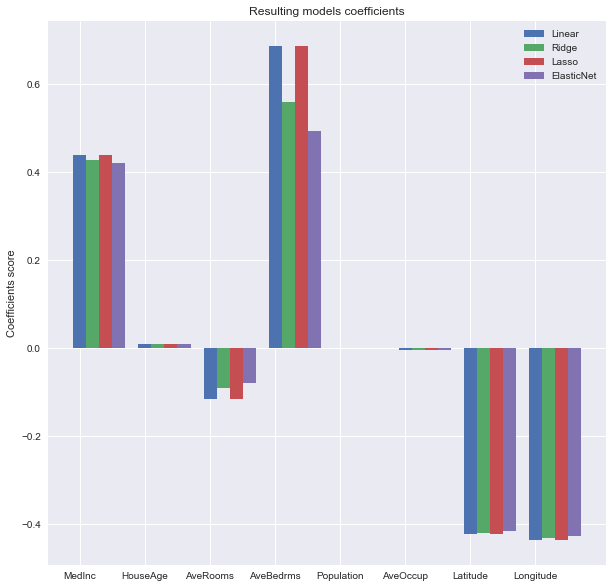

In [38]:
index = np.arange(len(ca.feature_names))
fig, ax = plt.subplots(figsize=(10,10))
bar_width = 0.2
opacity = 0.8
 
bar1 = plt.bar(index, LR.coef_, bar_width,
                 label='Linear') 
bar2 = plt.bar(index + bar_width, RD_best.coef_, bar_width,
                 label='Ridge')
bar3 = plt.bar(index + 2*bar_width, LS_best.coef_, bar_width,
                 label='Lasso')
bar4 = plt.bar(index + 3*bar_width, EN_best.coef_, bar_width,
                 label='ElasticNet')
plt.title("Resulting models coefficients")
plt.ylabel("Coefficients score")
plt.legend()
tick = plt.xticks(y_pos, ca.feature_names)

## Answer 1.5:

Yes, they agree on the important features such as MedLinc, AveRooms, AveBedrms, Latitude and Longtitude.